In [1]:
import random
import os
import urllib3
import pandas as pd
from pandas import Series
import geopandas as gpd
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imageio
from matplotlib.lines import Line2D

COMMON_DIR = os.path.join(os.pardir, 'common')
sys.path.insert(1, COMMON_DIR)

import data_retreiver
import time_adjusted_price as money
print(dir(data_retreiver))
from datetime import date

['DATASETS', 'DATA_PATH', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'download_datasets', 'download_file', 'load_csv_datasets', 'os', 'pd', 'urllib3']


In [2]:
data_retreiver.download_datasets()

In [3]:
(fam_sales, fam_core, year_sales) = data_retreiver.load_csv_datasets("single_family_sales", "single_family_core", "year_sales")

fam_sales_g0 = fam_sales[fam_sales["Price_Time_Adjusted"] > 0]
fam_sales_g0 = fam_sales_g0[fam_sales_g0["Conveyance_Included"] == "1 Parcel"]
fam_sales_g0

,Date,Buyer,Seller,Price,Kind,Conveyance_Included,Year,Price_Inflated,Price_Time_Adjusted
Parcel,,,,,,,,,
81034103127,2005-06-01,"LESH, RICHARD L, & PAMELA M LESH","REAMER, BRIAN H, & CARMEN E RIVERA",219900.0,Warranty Deed,1 Parcel,2005,292467.0,316441.0
81034103127,1996-02-01,REAMER & RIVERA,"SIMON INC, DON",137000.0,Warranty Deed,1 Parcel,1996,227420.0,340113.0
70824219096,2016-11-01,"HUNT, FREDERICK AARON, LISA M ASHENBRENNER HUNT","ALLEN, CHARLES DWIGHT",324100.0,Warranty Deed,1 Parcel,2016,350028.0,396828.0
70824219096,2004-07-01,"ALLEN, CHARLES DWIGHT","TRUGESON, JAMES F, & KAY M TURGESON",324000.0,Warranty Deed,1 Parcel,2004,447120.0,468840.0
70824219096,1994-03-01,TURGESON & WEHRMAN,"TURGESON, JOHN & SALLY",100000.0,Warranty Deed,1 Parcel,1994,175000.0,293750.0
...,...,...,...,...,...,...,...,...,...
70913111294,1997-07-01,DOOLITTLE & HOPPMANN,"JACKSON, DANIEL & HOLLY",70000.0,Warranty Deed,1 Parcel,1997,113400.0,225162.0
70913111294,1994-11-01,"JACKSON, DANIEL & HOLLY",NORTHWOOD INVESTMENTS,62000.0,Warranty Deed,1 Parcel,1994,108500.0,227250.0
70913111294,1990-03-01,NORTHWOOD INVESTMENTS,"SWENSON, LUCILLE",32000.0,Other,1 Parcel,1990,63680.0,224410.0


In [6]:
def prices_for_parcel(parcel, sales_df):
    sales_for_parcel = sales_df[sales_df.index == parcel]
    return sales_for_parcel

num_run = 0
def price_growth_coefficient(parcel, sales_df):
    global num_run
    num_run += 1
    if(num_run % 500 == 0):
        print(num_run)
    sales_for_parcel = prices_for_parcel(parcel, sales_df)

    if(len(sales_for_parcel) < 2):
        return np.nan

    linear_coefficients = np.polyfit(sales_for_parcel["Year"], sales_for_parcel["Price_Time_Adjusted"].values, deg=1)
    slope = linear_coefficients[0]
    if(slope > 40000):
        slope = np.nan
    elif(slope < -30000):
        slope = np.nan
    return slope

#hmm = fam_core.index.to_series().apply(lambda pid: price_growth_coefficient(pid, fam_sales_g0))

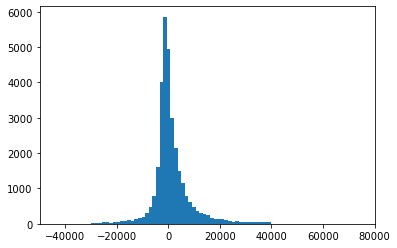

In [64]:
slopes = hmm
slopes_full = slopes[slopes.notna()]
slopes_full
all_valid_slopes = slopes_full.values
fig, ax = plt.subplots()
ax.set_xlim(-50000, 80000)
ax.ticklabel_format(style='plain')
ax.ticklabel_format(useOffset=False)
ax.hist(all_valid_slopes, bins=50)

print()

In [48]:
c = 0
def most_recent_sale_price_time_adjusted(parcel):
    global c
    c +=1
    if(c % 1000 ==0):
        print(c)
    data = prices_for_parcel(parcel, fam_sales_g0)
    if(len(data) < 1):
        return np.nan

    sorted_data = data.sort_values(by=['Date'])
    return sorted_data.iloc[-1]["Price_Time_Adjusted"]

def most_recent_sale_price_inflated(parcel):
    data = prices_for_parcel(parcel, fam_sales_g0)
    if(len(data) < 1):
        return np.nan

    sorted_data = data.sort_values(by=['Date'])
    return sorted_data.iloc[-1]["Price_Inflated"]

#slopes_dict = pd.read_csv()
def most_recent_growth_factor(parcel):
    if parcel in reee:
        return reee[parcel]
    else:
        return np.nan

#fam_core["Recent_Sales_Price_Time_Ajusted"] = fam_core.index.to_series().apply(most_recent_sale_price_time_adjusted)
#fam_core["Recent_Sales_Price_Inflated"] = fam_core.index.to_series().apply(most_recent_sale_price_inflated)
#fam_core["Recent_Sales_Price_Growth"] = fam_core.index.to_series().apply(most_recent_growth_factor)

In [53]:
slopes_dict = pd.read_csv("slopes.csv",index_col=0, dtype={"Parcel": "str"})["Parcel.1"].to_dict()
reee = {}
for p in slopes_dict:
    reee[str(p)] = slopes_dict[p]
reee
#s = [x for x in fam_core["Recent_Sales_Price_Growth"].values if x != np.nan]

#fam_core["Recent_Sales_Price_Growth"].values[500:550]
#slopes_dict.keys()
fam_core.to_csv("single_family_core.csv")